# **Case Study 3**
## Spam Classification
  
  
---


#Team DEAN:
#**D**avid Wei | **E**dward Roske | **A**dam Canton | **N**eil Benson

#**Business Understanding**
*   **Problem**: Spam is making it difficult for people to identify real/valuable emails compared to unsolicited and potentially harmful emails.
*   **Objective**: Using 9,373 emails pre-labeled as real (that is, "not-spam") or spam, the team built a model to classify future, incoming emails as real or spam.
*   **Why is this important?**: The amount of spam sent by sellers and scammers is increasing every day. Without a good spam filter, it would be impossible to find all the real emails in the midst of the unwanted emails. Further, spam messages trying to defraud the reader are also on the rise, and a quality classification model can help minimize potential criminal activity.
  
# **Modeling Preparations**
*   **Proposed methods**: Once [Data Engineering](#DataEngineering) was complete, the team used clustering to find a further way of grouping emails together (which may or may not improve model performance). The team then used Naive Bayes to create a classifier to predict if emails were spam or not-spam. For both clustering and Naive Bayes, the team used a Grid Search for hyper tuning of the parameters.
*   **Sampling Technique**: Since the data was [unbalanced](#Crossfold) with 74.3% of the emails labeled as "not=spam", it was important to use stratified sampling. The team chose to use a stratified cross-fold validation with 5 folds to minimize overfitting for all but the final fully tuned model. For the final model, the data was fit to an 80/20 train/test stratified shuffle split.
*   **Appropriateness**: Clustering is an unsupervised method that is appropriate for finding potential groupings in data. Naive Bayes is a common supervised learning classification technique for binary classes. Since our email is either "spam" or "not-spam", Naive Bayes was an appropriate method that uses probability scores to determine the likelihood of something falling into one of two classes.  
*   **Usefulness of this approach**: Our goal was to minimize spam by finding messages likely to be spam vs not-spam. The team used F1 scores when hypertuning the parameters to make the most optimal spam filter possible, but when in doubt, the team erred on the side of a suspect email being declared "not-spam". This was because the cost of valid emails being marked as invalid was greater than the benefit of limiting as many messages as possible.  
*   **Evaluation Metrics**: Since our goal was a balanced classification between precision (a way to assess false positives) and recall (a way to assess false negatives), the team chose to use F1 score to weed out underperforming models. F1 scores are calculated based on 2*((precision*recall)/(precision+recall)) and will range from 0 (completely incorrect model) to 1 (completely perfect model). To compare models across different discrimination thresholds, though, F1 isn't as helpful. As such the the team also included an [ROC curve](#ROCCurve) (Receiver Operating Characteristics) for the final model run against the test data.  

  
<a name="DataEngineering"></a>
# **Data Engineering**
*   **Data Issues**: The data was initially provided in an unstructured format consisting of 9,373 emails divided into 5 folders designating if the emails were "ham" (AKA "not-spam") or "spam." The biggest problem to overcome was converting this data into a structured, numeric series of attributes that could be used for clustering and Naive Bayes classification. Another notable problem with the data was that attributes needed to be extracted from the unstructured data (such as "subject line") but the attributes varied from email text file to email text file. One issue was added in during feature creation which was that once the data was made into a numeric format, it was unscaled with different means and standard deviations.  
*   **Transformation Method**: To begin with, the team used Python to convert the data from unstructured to structured. The team looped through each file gathering information about each email and adding it to data frames. 
*   **Feature Engineering**: As each email was being parsed, the team created various features (such as count of capitalized words or punctuation in the subject) that might help determine if an email was spam or not.  As mentioned before, the data used different units, and so that the features were directly comparable, the team scaled the data. The features created were modified so that they were correctly represented as continuous or categorical. The following features were added (not including the NLP features added later:
  *   filename
  *   email_body
  *   contains_reply
  *   is_multipart
  *   sub_line_all_caps
  *   sub_line_punctuation
  *   sub_line_punctuation_cnt
  *   sub_line_repeat_punct
  *   sub_line_repeat_punct_cnt
  *   sub_line_cap_words_cnt
  *   sub_line_cap_length_total
  *   sub_line_cap_length_average
  *   sub_line_cap_length_longest
  *   digits_in_sub_line
  *   body_lines
  *   blank_lines
  *   is_spam
*   **Natural Language Processing**: Initial modeling based on more easily obtained features didn't return F1 scores at an acceptable enough level, so the team analyzed the body portion of the text using NLP (Natural Language Processing) to create information such as lexical diversity. Using NLP was almost a project in and of itself, and the evaluators of this study could additionally reward the research team for going above and beyond.  
*   **Missing Values**: All the 9,373 emails were labeled, so in the big picture sense, no mandatory data was missing. That said, many attributes that were created had a large number of zero (for continuous features) or false (for binary categorical classes) values. These were correct, so they were left in for model creation. For evidence that no data was missing, see the [Missing Data](#Missing) section.    
*   **EDA**: For the features created, the continuous attributes all range from 0 (meaning that the count for that feature or the ratio had a zero for the denominator) to positive numbers. There are outliers, but these values are valid, so the features needed to be normalized. There are roughly 3 times as many non-spam emails as spam emails, so the team needed to use stratified splitting/sampling. Most of the data was not heavily correlated. Since the goal of the model is not feature importance, all features were left in the model to improve the effectiveness of the model. For additional details, tables, and charts, see [EDA](#EDA).     
*   **Assumptions and Other Relevant Notes**: The research team was making multiple assumptions in this case. First, the team assumed that the importance of receiving emails that might be spam was more important than limiting 100% of suspect emails. The team was also assuming that the emails provided were correctly pre-sorted into spam vs. non-spam. It is important to note that spammers are getting more sophisticated every day and this model will need to be constantly updated with newly classified emails.

  
# **Model Building & Evaluation**
*   **Clustering**: For the unsupervised learning portion of the model, the research team used a clustering algorithm called DBScan. DBScan uses density to group values that are near together into similar clusters. Using a V Measure Score, the team used a Grid Search to hypertune the clustering iterating through 25 models. The best values for the distance between points threshold (eps) was 0.1 and for the minimum sample count was 3. While the class target was used to tune the hyperparameters (so we had some way of telling if our clusters were making logical sense), once the parameters were tuned, the clustering algorithm created its clusters (labeled in the model as 'cluster_id') using only the feature data. In other words, the target was omitted from the data when actually creating the clusters. For additional details, see [Clustering](#Clustering).     
*   **Naive Bayes**: As mentioned above, stratified 5-fold cross-validation was used for the DBScan Clustering and all hyperparameter tuning, but an 80/20 train/test stratified shuffle split was used for the final Gaussian Naives Bayes model. For the hypertuning, the team evaluated 7 different models comparing each based on a F1 score and the best model used a var_smoothing value of 0.0001. For additional details, see [Naive Bayes](#NaiveBayes).     
*   **Analysis of Model Performance**: We hypertuned our parameters for both the clustering algorithm (using V Measure) and the Naives Bayes models (using F1 score). Our original best Naive Bayes model did not use the NLP attributes and earned an F1 score of 0.250. The team didn't feel this was decent enough, so after adding various NLP attributes (and hypertuning the model with NLP attributes), the F1 score rose to 0.423. The time to generate these additional NLP features was over 1 hour, 44 minutes, but the team felt that the gain in performance was worth the time trade-off. For additional details, see [F1 Score](#F1Scores). 

  
# **Case Conclusions**
*   **Conclusion**: It is possible to make a decent classifier that runs relatively quickly using a Naives Bayes model. The longest part of the classification is adding NLP attributes such as word count, vocabulary size, and lexical diversity (are the same words used frequently or is the ratio of "total distinct words" to "word count" fairly high). But in less than 2 hours total run-time, a model can be trained and fitted generating a decent classifier (F1 Score = 0.423).  
*   **How to View the Results**: An F1 Score of 0.423 is... not great. While the model is fairly good at determining when that a non-spam email is indeed not-spam, as the [confusion matrix](#ConfusionMatrix) shows, the current model is classifying too many non-spam emails as spam.   
*   **Proposed Going Forward**: The research team is proposing that this model not be used as is but rather be treated as a proof of concept. Spam can indeed be predicted based on various attributes, but much greater development is needed... or one could use a professional spam filter.
*   **Go Forward Considerations**: While the [ROC Curve](#ROCCurve) shows that the model is doing better than random chance, far more model development needs to be done before this model could be used in practice. Further, the model must be regularly retrained as spammers get more intelligent in their solicitous ways.  
*   **Other Possible Approaches**: Naives Bayes is often used as a simple starting point, but other possible models would likely perform better such as an Random Forest Classifier or an XGBoost classifier, but the real benefit would be added by adding more (and more relevant) features. The team advises that the next pass of this model should try using TF-IDF (Term Frequency - Inverse Document Frequency) metrics.   

  
# **Report Format**
*   **Format**: The research team felt that an easy-to-read PDF report was most helpful for quick consumption. That said, there is significant code, output, and diagrams that contain additional details that may be of interest to different readers. The team has included all of this information below, and if this topic is of interest, please continue reading beyond this point beginning with the [Data Prep and EDA](#DataPrepAndEDA).



---


# Packages


In [ ]:
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

In [ ]:
# sys
import os
from os.path import isfile
from inspect import CO_VARARGS
import warnings

warnings.filterwarnings("ignore")  # ignoring warnings

# SKLearn
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn import metrics

#NLTK & NLP
import nltk
from urllib import request
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
from string import punctuation
from nltk.stem import PorterStemmer


# Other Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pandas_profiling import ProfileReport
from os import listdir, walk
from os.path import isfile, join
import re
import string
from itertools import groupby
import seaborn as sns
import email #library for managing email messages

In [ ]:
# intel patch for running sklearn - this helps performance a lot
from sklearnex import patch_sklearn

patch_sklearn()



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<a name="DataPrepAndEDA"></a>
# Data Prep and EDA

### Helper functions

In [ ]:
# to count letters and punctuation in a string
count = lambda l1, l2: sum([1 for x in l1 if x in l2])


def replace_multiple(mainString, toBeReplaces, newString):
    """
    Replace a set of multiple sub strings with a new string in main string.
    """
    # Iterate over the strings to be replaced
    for elem in toBeReplaces:
        # Check if string is in the main string
        if elem in mainString:
            # Replace the string
            mainString = mainString.replace(elem, newString)

    return mainString


def grid_search(X, y, model, grid, score, cv):
    # define search
    search_grid_search_measure = GridSearchCV(
        model, grid, scoring=score, cv=cv, n_jobs=nj, verbose=1
    )

    labels_true = y.to_numpy()
    labels_true = np.squeeze(np.asarray(np.transpose(labels_true)))

    # perform the search
    results_grid_search_measure = search_grid_search_measure.fit(X, labels_true)

    return results_grid_search_measure



### Setting global variables

In [ ]:
##### TEST with 3 varying sizes of data: small, medium, all 
# directory = "g:/My Drive/Masters/Summer 2021 (NLP, QTW, Cap A)/DS 7333 - Quantifying the World/Case Studies/Case Study 3/Test Data_small"
# directory = "g:/My Drive/Masters/Summer 2021 (NLP, QTW, Cap A)/DS 7333 - Quantifying the World/Case Studies/Case Study 3/Test Data_medium"
directory = "g:/My Drive/Masters/Summer 2021 (NLP, QTW, Cap A)/DS 7333 - Quantifying the World/Case Studies/Case Study 3/Data"

#directory = "/home/bensonnd/msds/ds7333/case_study_3/Data"

sub_dirs = [x[0] for x in os.walk(directory) if x[0] != directory]

results_df = pd.DataFrame()

# setting n_jobs
nj = -1

### Parsing email files

In [ ]:
%%time
for d in sub_dirs:
    files = [f for f in os.listdir(d) if os.path.isfile(os.path.join(d, f))]

    try:
        files.remove(".DS_Store")
        files.remove("Zone.Identifier")
    except:
        pass

    for file in files:
        ############## ADDING (06_02, David): "Email_body" content ##############
        # storing empty email body messages
        email_body_temp = []
       ############## "email_body" content END ##############

        with open(f"{d}/{file}", encoding="latin1") as f:
            lines = f.readlines()

        in_reply_cnt = 0  # is there a reply thread
        sub_line_all_caps = 0  # is subject line all caps
        sub_line_punctuation = 0  # does subject line have punctuation
        sub_line_punctuation_cnt = 0  # count punctuation chars in subject line
        sub_line_repeat_punct = 0  # does subject line have repeat punctuation
        sub_line_repeat_punct_cnt = 0  # count repeat punctuation chars in subject line
        is_multipart = 0  # is multi-part
        cap_words_sub_line_cnt = 0  # count of cap words in subject line
        capital_run_length_total_s_line = 0  # total length of cap words in subject line
        capital_run_length_average_s_line = (
            0  # average length of cap word in subject line
        )
        capital_run_length_longest_s_line = (
            0  # longest length of cap word in subject line
        )
        digits_in_sub_line = 0  # are there digits in the subject line
        n_lines = len(lines)  # number of lines in the whole file
        blank_lines = 0  # number of blank lines in the whole file

        for line in lines:
            if "Subject: " in line:
                s_line = line.strip().replace("Subject: ", "")

                if re.search(r"subject:.* re:", line.lower()):
                    in_reply_cnt = 1
                    s_line = replace_multiple(s_line, ["Re: ", "RE: ",], "")

                # remove special characters and white space
                s_line_string = "".join(e for e in s_line if e.isalnum())

                # subject line contains digits
                if re.search(r"\d", s_line_string):
                    digits_in_sub_line = 1

                    # remove digits to check if all upper
                    s_line_string = re.sub(r"\d", "", s_line_string)

                num_upper = sum(1 for c in s_line_string if c.isupper())
                ttl_chars = len(s_line_string)

                # check if all upper
                if num_upper == ttl_chars:
                    sub_line_all_caps = 1

                # find the number of cap words in the subject line
                cap_words_sub_line = re.findall(r"(?!RE:)\b[A-Z]{1,}\b", s_line)
                cap_words_sub_line_cnt = len(cap_words_sub_line)

                # capital word lengths in subject line
                if cap_words_sub_line_cnt:
                    cap_word_lengths = [len(word) for word in cap_words_sub_line]

                    # the total length capital words in subject line
                    capital_run_length_total_s_line = sum(cap_word_lengths)

                    # the average length capital word in subject line
                    capital_run_length_average_s_line = (
                        capital_run_length_total_s_line / len(cap_words_sub_line)
                        if len(cap_words_sub_line)
                        else 0
                    )

                    # the longest all capital word in the subject line
                    capital_run_length_longest_s_line = (
                        max(cap_word_lengths) if cap_word_lengths else 0
                    )

                # punctation count and repeats in subject line
                if any(char in string.punctuation for char in line if char != ":"):
                    # does subject line contain any punctuation
                    sub_line_punctuation = 1

                    # total count of punctuation in subject line
                    sub_line_punctuation_cnt = count(s_line, set(string.punctuation))

                    # are punctuation chars repeated consecutively in subject line
                    consecutive_repeats = groupby(s_line)
                    punct_consecutive = [
                        (label, sum(1 for _ in group))
                        for label, group in consecutive_repeats
                        if label in string.punctuation
                    ]

                    # identify consecutive repeating punctuation chars in subject line
                    for punct in punct_consecutive:
                        if punct[1] > 1:
                            sub_line_repeat_punct = 1

                            # total consecutively repeated punctuation chars in subject line
                            sub_line_repeat_punct_cnt += punct[1]

            if "content-type: multipart" in line.lower():
                is_multipart = 1

            if line == "\n":
                blank_lines += 1

            ############## ADDING (06_02, David): "Email_body" content ##############
            # append all lines into email_body
            email_body_temp.append(line)
            # once appended convert from list to string form
            email_body = ''.join(email_body_temp)
            # using email library to extract the email body
            b = email.message_from_string(email_body)
            body = ""
            # cleans email body and filters through non-"email body" type content
            if b.is_multipart():
                for part in b.walk():
                    ctype = part.get_content_type()
                    cdispo = str(part.get('Content-Disposition'))

                    # skip any text/plain (txt) attachments
                    if ctype == 'text/plain' and 'attachment' not in cdispo:
                        body = part.get_payload(decode=True)  # decode
                        break
            # not multipart - i.e. plain text, no attachments, keeping fingers crossed
            else:
                body = b.get_payload(decode=True)
          ############## "email_body" content END ##############

        temp_df = pd.DataFrame(
            {
                "filename": file,
                ############## ADDING (06_02, David): "Email_body" content ##############
                "email_body": body,
                ############## "email_body" content END ##############
                "contains_reply": in_reply_cnt,
                "is_multipart": is_multipart,
                "sub_line_all_caps": sub_line_all_caps,
                "sub_line_punctuation": sub_line_punctuation,
                "sub_line_punctuation_cnt": sub_line_punctuation_cnt,
                "sub_line_repeat_punct": sub_line_repeat_punct,
                "sub_line_repeat_punct_cnt": sub_line_repeat_punct_cnt,
                "sub_line_cap_words_cnt": cap_words_sub_line_cnt,
                "sub_line_cap_length_total": capital_run_length_total_s_line,
                "sub_line_cap_length_average": capital_run_length_average_s_line,
                "sub_line_cap_length_longest": capital_run_length_longest_s_line,
                "digits_in_sub_line": digits_in_sub_line,
                "body_lines": n_lines - blank_lines,
                "blank_lines": blank_lines,
                "is_spam": [1 if "spam" in d else 0],
            },
            index=[0],
        )

        results_df = results_df.append(temp_df, ignore_index=True)
        

# source: adapted from QTW lecture 5

Wall time: 6min


In [ ]:
results_df.head()

,filename,email_body,contains_reply,is_multipart,sub_line_all_caps,sub_line_punctuation,sub_line_punctuation_cnt,sub_line_repeat_punct,sub_line_repeat_punct_cnt,sub_line_cap_words_cnt,sub_line_cap_length_total,sub_line_cap_length_average,sub_line_cap_length_longest,digits_in_sub_line,body_lines,blank_lines,is_spam
0,00001.7c53336b37003a9286aba55d2945844c,"b' Date: Wed, 21 Aug 2002 10:54:46 -...",1,0,0,0,0,0,0,0,0,0.0,0,0,93,20,0
1,00002.9c4069e25e1ef370c078db7ee85ff9ac,"b""Martin A posted:\nTassos Papadopoulos, the G...",1,0,0,1,2,0,0,0,0,0.0,0,0,65,8,0
2,00003.860e3c3cee1b42ead714c5c874fe25f7,"b""Man Threatens Explosion In Moscow \n\nThursd...",0,0,0,1,2,0,0,0,0,0.0,0,0,73,9,0
3,00004.864220c5b6930b209cc287c361c99af1,"b""Klez: The Virus That Won't Die\n \nAlready t...",0,0,0,1,4,0,0,1,3,3.0,3,0,69,9,0
4,00005.bf27cdeaf0b8c4647ecd61b1d09da613,"b""> in adding cream to spaghetti carbonara, w...",1,0,0,1,2,0,0,0,0,0.0,0,0,66,11,0


<a name="EDA"></a>
### EDA

Let's start by getting a list of columns (before NLP):

In [ ]:
results_df.columns

Index(['filename', 'email_body', 'contains_reply', 'is_multipart',
       'sub_line_all_caps', 'sub_line_punctuation', 'sub_line_punctuation_cnt',
       'sub_line_repeat_punct', 'sub_line_repeat_punct_cnt',
       'sub_line_cap_words_cnt', 'sub_line_cap_length_total',
       'sub_line_cap_length_average', 'sub_line_cap_length_longest',
       'digits_in_sub_line', 'body_lines', 'blank_lines', 'is_spam'],
      dtype='object')

It's a good idea to get some summary statistics about each of these columns. While there are outliers, these values are all valid (they were just generated) so we will leave all of them in. It does speak to a need to normalize our data, so we'll do that later:

In [ ]:
results_df.describe()

,contains_reply,is_multipart,sub_line_all_caps,sub_line_punctuation,sub_line_punctuation_cnt,sub_line_repeat_punct,sub_line_repeat_punct_cnt,sub_line_cap_words_cnt,sub_line_cap_length_total,sub_line_cap_length_average,sub_line_cap_length_longest,digits_in_sub_line,body_lines,blank_lines,is_spam
count,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.00000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000,9353.000000
mean,0.392067,0.080616,0.024912,0.710788,2.580455,0.113974,0.59072,0.604512,2.259168,1.166761,1.344595,0.232225,103.692184,15.289319,0.256495
std,0.488238,0.272259,0.155865,0.453421,19.765579,0.317797,13.61309,1.581412,6.374737,1.884884,2.294328,0.422274,176.618774,31.644949,0.436722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,6.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,9.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.00000,1.000000,3.000000,2.500000,3.000000,0.000000,98.000000,14.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1884.000000,1.000000,1290.00000,104.000000,354.000000,12.000000,14.000000,1.000000,6310.000000,756.000000,1.000000


We want a count of non-spam (value=0) versus spam (value=1). We also want this information in a percentage. Roughly 74.3% of our data is non-spam, so we'll need to stratify our splits later:

In [ ]:
results_df['is_spam'].value_counts(normalize=False)

0    6954
1    2399
Name: is_spam, dtype: int64

In [ ]:
results_df['is_spam'].value_counts(normalize=True)

0    0.743505
1    0.256495
Name: is_spam, dtype: float64

Most of our data is NOT heavily correlated (at least, correlated r<0.50). There are some features that are (such as things related to capitalized words) but since our goal is not feature importance, we will leave all features in the model:

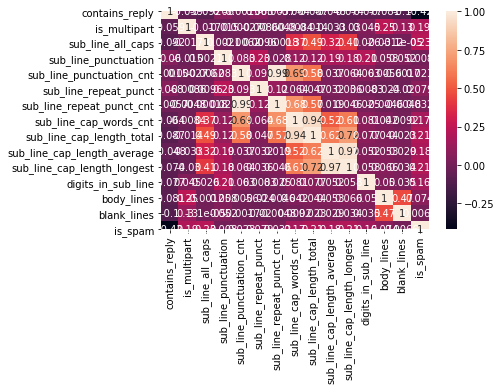

In [ ]:
corrMatrix = results_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<a name="Missing"></a>
### Missing Data
No fields have missing data:

In [ ]:
results_df.isnull().sum()

filename                       0
email_body                     0
contains_reply                 0
is_multipart                   0
sub_line_all_caps              0
sub_line_punctuation           0
sub_line_punctuation_cnt       0
sub_line_repeat_punct          0
sub_line_repeat_punct_cnt      0
sub_line_cap_words_cnt         0
sub_line_cap_length_total      0
sub_line_cap_length_average    0
sub_line_cap_length_longest    0
digits_in_sub_line             0
body_lines                     0
blank_lines                    0
is_spam                        0
dtype: int64

### Feature Engineering Email Content Attributes

In [ ]:
# cleans email content and provides indicator if it contains a url link or not
def clean_email_body(string: 'takes in objects'):
    test_var = str(string).replace(r"\n", "").replace('\r','').replace('\\', '').replace('-','').replace('_','')
    re.sub('^[^A-Za-z]*', '', test_var)
    # # remove the leading 'b' since the initial byte dtype is carried over to the str conversion 
    # test_var = test_var[1:] if test_var[0]=='b' else test_var
    # test if email is actually html code and not email
    test_var = '' if "<HTML><HEAD><TITLE>" in test_var else test_var
    # test if email contains a url link to somewhere: 1= yes, 0=no
    http_ind = 1 if "http://" in test_var else 0
    return test_var, http_ind

# normalizing text for NLP processing
def normalize_text(text):
    # lowercase all text
    text_normalized = text.lower()

    # tokenize the text using TokTok since it's the fastest tokenizer available:
    ### Source: https://stackoverflow.com/questions/41912083/nltk-tokenize-faster-way
    toktok = ToktokTokenizer()
    text_tokenized = toktok.tokenize(text_normalized)

    #  filtering out stopwords from text
    stop_words = set(stopwords.words('english'))
    remove_stopwords = [w for w in text_tokenized if not w.lower() in stop_words]

    # stemming
    ps = PorterStemmer()
    def stemText(text):
        stem_text=[]
        for word in text:
            stem_text.append(ps.stem(word))
            stem_text.append(" ")
        return "".join(stem_text)
    stemmed_text = stemText(remove_stopwords)

    return stemmed_text

# create basic NLP attributes
def getNLPStuff(text):
    word_count = len(text)
    vocab_size = len(set(text))
    # to avoid division by zero
    if vocab_size != 0:
        diversity_score = vocab_size / word_count
    else: diversity_score = 0 # the idea here is that if the vocab_size is 0, then there is no text available so we don't want to score it
    return word_count, vocab_size, diversity_score

In [ ]:
%%time
# selecting only the filename and email_body from results_df
email_body_arr = np.array(results_df.iloc[:,0:2])

# get only the email text
email_body_arr_text = email_body_arr[:,1]

cleaned_text_arr = np.array([])
http_ind_arr = np.array([])
word_count_arr = np.array([])
vocab_size_arr = np.array([])
diversity_score_arr = np.array([])

for i in email_body_arr_text:
    # cleaning email text
    cleaned_text_val = clean_email_body(i)[0]
    # adds http_ind as well
    cleaned_http_ind_val = clean_email_body(i)[1]

    # normalizing text
    normalized_text = normalize_text(cleaned_text_val)
    # get NLP attributes
    nlp_attributes = getNLPStuff(normalized_text)

    # cleaned email text and transforming to a 2d array to add back to file indexes
    cleaned_text_arr = np.append(cleaned_text_arr, normalized_text).reshape((-1,1))
    # http_ind
    http_ind_arr = np.append(http_ind_arr, cleaned_http_ind_val).reshape((-1,1))
    # word_count
    word_count_arr = np.append(word_count_arr, nlp_attributes[0]).reshape((-1,1))
    # vocab_size
    vocab_size_arr  = np.append(vocab_size_arr, nlp_attributes[1]).reshape((-1,1))
    # diversity_score
    diversity_score_arr = np.append(diversity_score_arr, nlp_attributes[2]).reshape((-1,1))

# adding new attributes back to email_body and only preserving the cleaned email content
email_body_arr = np.concatenate((email_body_arr[:,0].reshape((-1,1)), cleaned_text_arr, http_ind_arr, word_count_arr, vocab_size_arr, diversity_score_arr), axis=1)

Wall time: 1h 44min 7s


In [ ]:
email_df = pd.DataFrame(
    {
        "filename": email_body_arr[:,0],
        "email_http_ind": email_body_arr[:,2],
        "email_word_count": email_body_arr[:,3],
        "email_vocab_size": email_body_arr[:,4],
        "email_lexical_diversity_score": email_body_arr[:,5],
    }
)

combined_df = results_df.merge(email_df, left_on='filename', right_on='filename')
combined_df = combined_df.loc[:, combined_df.columns != 'email_body']

In [ ]:
combined_df.head(1)

,filename,contains_reply,is_multipart,sub_line_all_caps,sub_line_punctuation,sub_line_punctuation_cnt,sub_line_repeat_punct,sub_line_repeat_punct_cnt,sub_line_cap_words_cnt,sub_line_cap_length_total,sub_line_cap_length_average,sub_line_cap_length_longest,digits_in_sub_line,body_lines,blank_lines,is_spam,email_http_ind,email_word_count,email_vocab_size,email_lexical_diversity_score
0,00001.7c53336b37003a9286aba55d2945844c,1,0,0,0,0,0,0,0,0,0.0,0,0,93,20,0,0.0,1265.0,57.0,0.045059


### Setting the target and the attribute data

In [ ]:
# attributes/predictor variables
X = combined_df.loc[:, combined_df.columns != "is_spam"]
X_no_filename = X.loc[:, X.columns != "filename"]

# target
y = combined_df["is_spam"]

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9368    1
9369    1
9370    1
9371    1
9372    1
Name: is_spam, Length: 9373, dtype: int64

<a name="Crossfold"></a>
### Crossfold setup
 Visualizing Response Variable Balance

0    6966
1    2407
Name: is_spam, dtype: int64


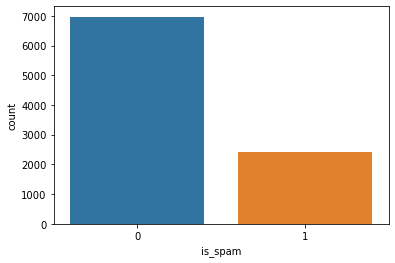

In [ ]:
sns.countplot(y)
print(y.value_counts())

 Because the target data is imbalanced, we want to stratify our folds. Setting up stratified 5 fold cv object.

In [ ]:
# setting up a cv object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

<a name="Clustering"></a>
# Clustering

Gridsearch/tune hyper parameters for DBScan

In [ ]:
# dbscan
cluster_dbs = DBSCAN()

# setting the grid parameters - dbscan
grid_dbs = {}
grid_dbs["eps"] = [.1, .25, .5, .75, 1]
grid_dbs["min_samples"] = [3, 6, 8, 10, 12]

dbs_results_v_measure = grid_search(
    X=X_no_filename, y=y, model=cluster_dbs, grid=grid_dbs, score="v_measure_score", cv=cv
)

# summarize dbscan grid search
print("Mean V Measure: %.3f" % dbs_results_v_measure.best_score_)
print("Config V Measure: %s" % dbs_results_v_measure.best_params_)
print(f"Best estimator: {dbs_results_v_measure.best_estimator_}\n")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean V Measure: nan
Config V Measure: {'eps': 0.1, 'min_samples': 3}
Best estimator: DBSCAN(eps=0.1, min_samples=3)



Setting the best parameters for dbscan clusters

In [ ]:
clf_dbs = dbs_results_v_measure.best_estimator_

In [ ]:
# adding the cluster label as an attribute
X_no_filename["cluster_id"] = clf_dbs.labels_

### Use Proper Variable Representations

In [ ]:
X_no_filename.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9373 entries, 0 to 9372
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   contains_reply                 9373 non-null   int64  
 1   is_multipart                   9373 non-null   int64  
 2   sub_line_all_caps              9373 non-null   int64  
 3   sub_line_punctuation           9373 non-null   int64  
 4   sub_line_punctuation_cnt       9373 non-null   int64  
 5   sub_line_repeat_punct          9373 non-null   int64  
 6   sub_line_repeat_punct_cnt      9373 non-null   int64  
 7   sub_line_cap_words_cnt         9373 non-null   int64  
 8   sub_line_cap_length_total      9373 non-null   int64  
 9   sub_line_cap_length_average    9373 non-null   float64
 10  sub_line_cap_length_longest    9373 non-null   int64  
 11  digits_in_sub_line             9373 non-null   int64  
 12  body_lines                     9373 non-null   i

In [ ]:
# list of categorical attributes
categoricals =  ["contains_reply","is_multipart","sub_line_all_caps","sub_line_punctuation","sub_line_repeat_punct","digits_in_sub_line","cluster_id"]

### Splitting the data into train/test data

In [ ]:
# Using StratifiedShuffleSplit to split into train and test sets to maintain class balance
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=24)

# setting the data and targets to numpy arrays
X_Array, y_Array = X_no_filename.to_numpy(), y.to_numpy()

# split into training and test sets
for train_index, test_index in sss.split(X_Array, y_Array):
    X_train, X_test = X_Array[train_index], X_Array[test_index]
    y_train, y_test = y_Array[train_index], y_Array[test_index]

X_train = pd.DataFrame(X_train, columns=X_no_filename.columns)
X_test = pd.DataFrame(X_test, columns=X_no_filename.columns)

Setting categoricals as that type

In [ ]:
for cat in categoricals:
    X_train[cat] = X_train[cat].astype('category')
    X_test[cat] = X_test[cat].astype('category')

<a name="Scaling"></a>
### Scaling/normalizing the data

In [ ]:
# get numeric columns
X_continuous_train = X_train.drop(categoricals, axis=1)
X_continuous_test = X_test.drop(categoricals, axis=1)

X_continuous_columns = X_continuous_train.columns

In [ ]:
# set the scaler
scl = StandardScaler()

# fit and transform
scl.fit(X_continuous_train)
X_train_continous_scale = scl.transform(X_continuous_train)
X_train_scale = pd.DataFrame(X_train_continous_scale, columns=X_continuous_columns)

scl.fit(X_continuous_test)
X_test_continous_scale = scl.transform(X_continuous_test)
X_test_scale = pd.DataFrame(X_test_continous_scale, columns=X_continuous_columns)

In [ ]:
# replace all numeric with scaled numeric
X_train = X_train.assign(**X_train_scale.to_dict(orient="series"))
X_test = X_test.assign(**X_test_scale.to_dict(orient="series"))

In [ ]:
X_train_ohe = pd.get_dummies(X_train, drop_first=True)
X_test_ohe = pd.get_dummies(X_test, drop_first=True)

<a name="NaiveBayes"></a>
# Naive Bayes Modeling
## Naive Bayes Classification

Gridsearch/tune hyper parameters for Naive Bayes

In [ ]:
clf_GNB = GaussianNB()

# setting the parameters
grid = {}
grid["var_smoothing"] = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# define search
search_f1 = GridSearchCV(clf_GNB, grid, scoring="f1", cv=cv, n_jobs=nj, verbose=1)

# perform the search
results_f1_nb = search_f1.fit(X_train, y_train)

# summarize the results
print("Mean f1: %.3f" % results_f1_nb.best_score_)
print("Config f1: %s" % results_f1_nb.best_params_)
print(f"Best estimator: {results_f1_nb.best_estimator_}\n")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Mean f1: 0.423
Config f1: {'var_smoothing': 0.0001}
Best estimator: GaussianNB(var_smoothing=0.0001)



<a name="F1Scores"></a>
## F1 Scores

Results running NB on only results_df (no NLP attributes)
```
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Mean f1: 0.250
Config f1: {'var_smoothing': 0.0001}
Best estimator: GaussianNB(var_smoothing=0.0001)
```
Results running NB on combined_df (includes NLP attributes)
```
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Mean f1: 0.423
Config f1: {'var_smoothing': 0.0001}
Best estimator: GaussianNB(var_smoothing=0.0001)
```





Setting the parameters for the Naive Bayes model based on F1 score

In [ ]:
clf_GNB = results_f1_nb.best_estimator_

<a name="ROCCurve"></a>
## ROC Curve

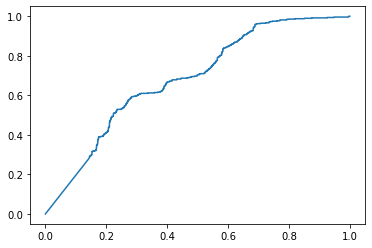

In [ ]:
# plot the ROC curve on the test data for Naive Bayes
clf_GNB.fit(X_train, y_train)
Y_pred_GNB_prob = clf_GNB.predict_proba(X_test)[::,1]
fpr_GNB, tpr_GNB, _ = metrics.roc_curve(y_test, Y_pred_GNB_prob)
auc_GNB = metrics.roc_auc_score(y_test, Y_pred_GNB_prob)
plt.plot(fpr_GNB, tpr_GNB, label="Gaussian Naive Bayes, auc=" + str(auc_GNB))

<a name="ConfusionMatrix"></a>
## Confusion Matrix

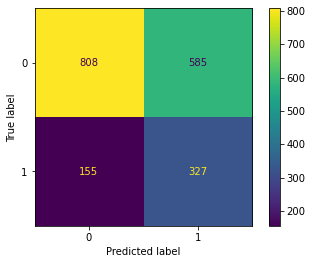

In [ ]:
# plot the confusion matrix for Naive Bayes
Y_pred_NGB = clf_GNB.predict(X_test)
cmd(confusion_matrix(y_test, Y_pred_NGB)).plot()
